# 02a - Overview

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = (
      pd.read_parquet("../data/flash_loans/polygon_aave_v3_flash_loans.parquet")
            .assign(evt_block_time = lambda x: pd.to_datetime(x.evt_block_time))
)

Text(0.5, 1.0, 'Total flash loans ($USD)')

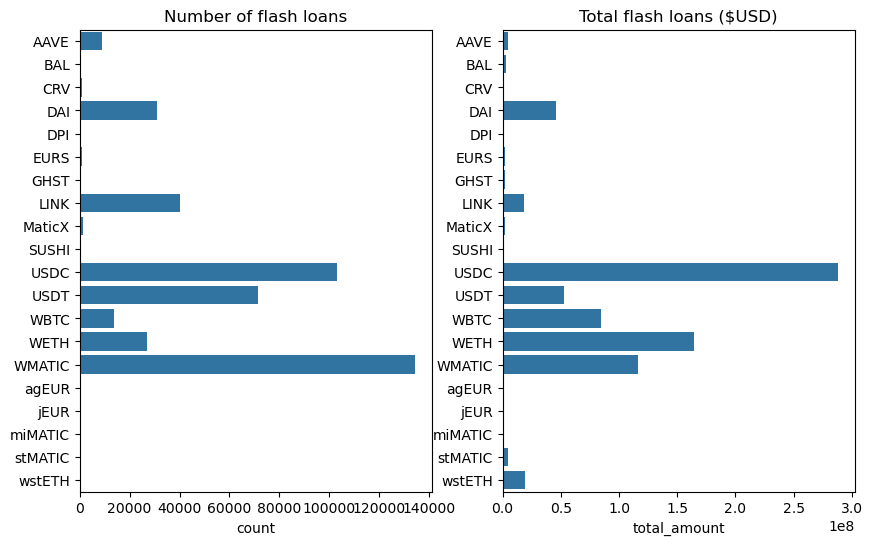

In [41]:
summarized_by_symbol = (df
    .groupby('symbol')
    .agg(
        {'amount_usd': ['count', 'sum', 'mean', 'median']}
        )
    .reset_index()
    .set_axis(['symbol', 'count', 'total_amount','avg_amount', 'median_amount'], axis=1)
)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

ax1 = sns.barplot(
    data=summarized_by_symbol,
    x='count', 
    y='symbol',
    ax=axs[0]
)
ax1.set_ylabel('')
ax1.set_title('Number of flash loans')

ax2 = sns.barplot(
    data=summarized_by_symbol,
    x='total_amount', 
    y='symbol',
    ax=axs[1]
)
ax2.set_ylabel('')
ax2.set_title('Total flash loans ($USD)')

In [62]:
summarized_by_symbol.dtypes

symbol                   object
date             datetime64[ns]
count                     int64
total_amount            float64
avg_amount              float64
median_amount           float64
dtype: object

In [67]:
import seaborn.objects as so


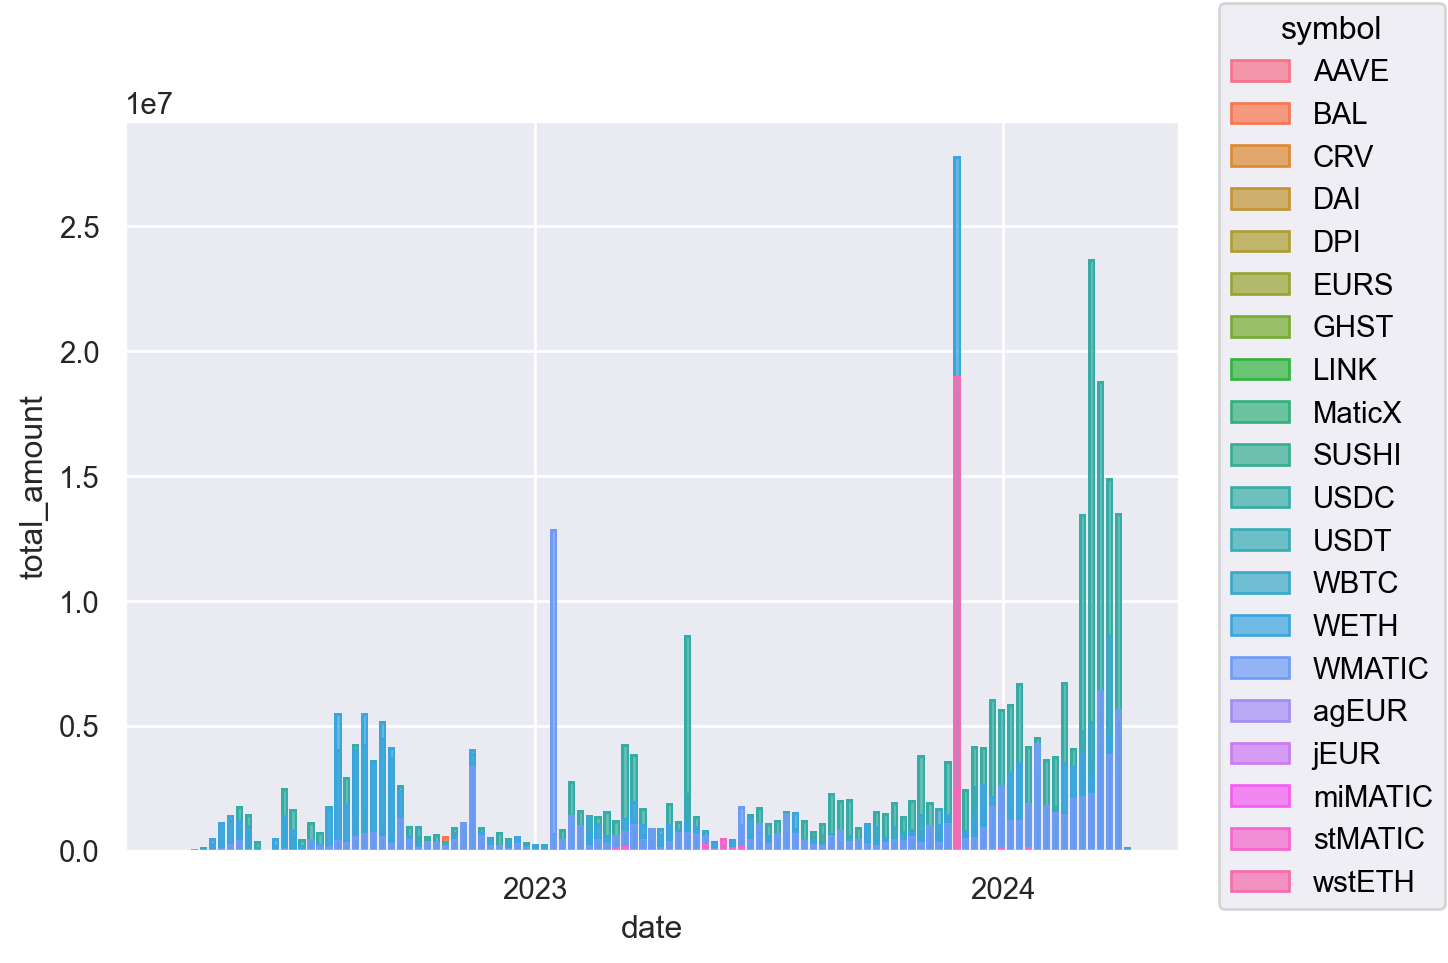

In [70]:
summarized_by_symbol = (df
    .groupby(['symbol', pd.Grouper(key='evt_block_time', freq='W')])
    .agg(
        {'amount_usd': ['count', 'sum', 'mean', 'median']}
        )
    .reset_index()
    .set_axis(['symbol', 'date', 'count', 'total_amount','avg_amount', 'median_amount'], axis=1)
    .assign(date = lambda x: pd.to_datetime(x.date.dt.date))
)

p = so.Plot(summarized_by_symbol, "date", "total_amount", color="symbol")
p.add(
    so.Bar()
)


<Axes: xlabel='tx_type'>

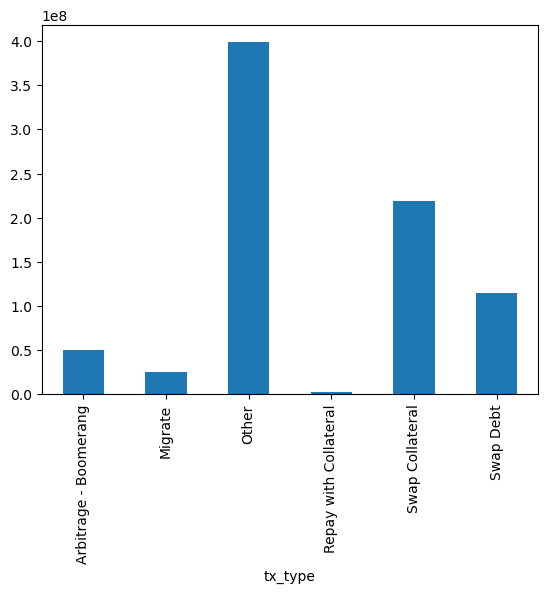

In [44]:
df.groupby('tx_type')['amount_usd'].sum().plot(kind='bar')